In [ ]:

# Model Based approaches: Linear, Exponential, Additive, Multiplicative, Quadratic 
# Data driven approaches: AR, MA, ARMA, ARIMA (p-order of auto regressive model, d-order of differencing, q-order of moving avg model)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

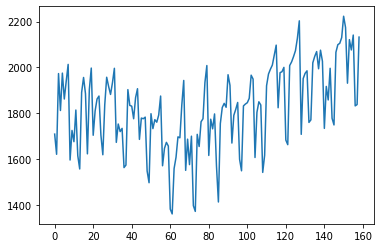

In [ ]:
walmart = pd.read_csv("footfalls.csv")
walmart.Footfalls.plot()
# Trend = No Linear but quadratic kind of trend is there
# Seasonality = No, Non Stationary data - magnitude of cycle is changing

In [ ]:
walmart.head()
# t - month (1st 2nd 3rd month and so on) - Independent feature
#Footfalls - in Jan 91 how many people visited Walmart and so on - target column
# check slide no. 33 in Forecasting-2 ppt.
# Log of Footfall is needed for Exponential model, t_square is required in Additive seasonality with Quadratic model.
# Jan to Dec are dummy variables for month column. 

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
walmart.shape # 159 months and 17 columns

(159, 17)

In [ ]:
walmart.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

In [ ]:
# to make the model understand about month year column, we need to extract month and year from month column using to_datetime() method
walmart["Date"] = pd.to_datetime(walmart.Month, format="%b-%y") # %b - month, %y - year
walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [ ]:
walmart.dtypes

Month                    object
Footfalls                 int64
t                         int64
log_footfalls           float64
t_square                  int64
Jan                       int64
Feb                       int64
Mar                       int64
Apr                       int64
May                       int64
Jun                       int64
Jul                       int64
Aug                       int64
Sep                       int64
Oct                       int64
Nov                       int64
Dec                       int64
Date             datetime64[ns]
dtype: object

In [ ]:
walmart.shape

(159, 18)

In [ ]:
# Extracting Day, Weekday name, month name, year from the date col. using date functions from pandas - only for plotting purpose
walmart["month"] = walmart.Date.dt.strftime("%b") # month extraction
walmart["year"] = walmart.Date.dt.strftime("%y") # year extraction

In [ ]:
walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91


In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=walmart)
# from 91 to 96 footfall was decreasing, then increased till 2003....

# Data Splitting

In [ ]:
train = walmart.head(147)
test = walmart.tail(12)

In [ ]:
train

In [ ]:
test

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Footfalls~t',data=train).fit() #Footfalls - target col, t - independent variable
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_linear = np.sqrt(mean_squared_error(test['Footfalls'],pred_linear)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_linear # RMSE should be minimum. try all models. Whichever model will give you min, RMSE that will be our final model


209.92559265462572

In [ ]:
# Exponential model

exp = smf.ols('log_footfalls~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_exp = np.sqrt(mean_squared_error(test['Footfalls'],pred_exp)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_exp

2062.9501154673767

In [ ]:
# Quadratic Model

quad = smf.ols('Footfalls~t+t_square',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(mean_squared_error(test['Footfalls'],pred_quad))
rmse_quad

137.15462741356146

In [ ]:
# Additive Seasonality Model - Pass from Jan to Nov

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Footfalls'],pred_add_sea))
rmse_add_sea

264.6643900568774

In [ ]:
# Additive Seasonality Quadratic Model
add_sea_quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Footfalls'],pred_add_sea_quad))
rmse_add_sea_quad

50.607245841424444

In [ ]:
# Multiplicative Seasonality

mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Footfalls'],pred_mul_sea))
rmse_mul_sea

2062.996088663915

In [ ]:
# Multiplicative Addive Seasonality

#mul_add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
#pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
#rmse_mul_add_sea = np.sqrt(mean_squared_error(test['Footfalls'],pred_mul_add_sea))
#rmse_mul_add_sea

2062.9434993334844

In [ ]:
# Compare the results

data = {"MODEL":pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])
# RMSE value for additive seasonality with quadratic trend is giving less RMSE value so this model is good for this dataset.
# To predict the footfall for next 12 months additive seasonality with quadratic trend model should be used.

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_quad,137.154627
0,rmse_linear,209.925593
3,rmse_add_sea,264.664390
6,rmse_mul_add_sea,2062.943499
1,rmse_exp,2062.950115
5,rmse_mul_sea,2062.996089
